In [64]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
data=pd.read_csv('C:/Users/Administrator/Downloads/archive (4)/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Handle missing values if any
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16612\2603131671.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_count=pd.value_counts(data["Class"],sort=True)


([<matplotlib.axis.XTick at 0x1e68ebb5610>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

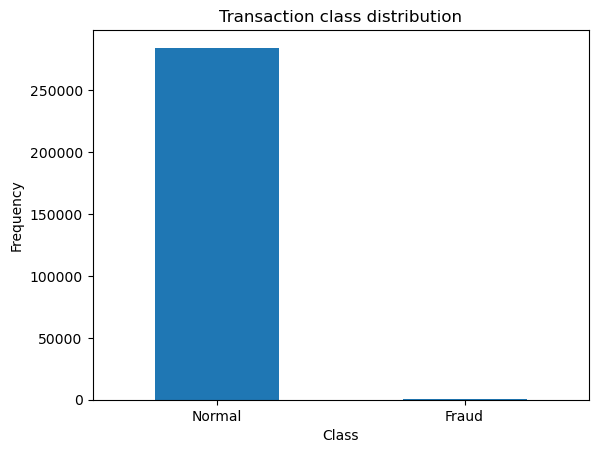

In [7]:
#CHECK THAT HOW MUCH TRANSCATION ARE NORMAL AND FRAUD, 
#FROM HERE WE CHECK THAT HOW MUCH DATASET IS IMBALANCE(normal99%,fraud1%)
class_count=pd.value_counts(data["Class"],sort=True)
# sort=True: The sort parameter, when set to True, sorts the counts in descending order. 
# This means the most frequent values will appear first.
class_count.plot(kind='bar',rot=0)
# rot=0: The rot parameter controls the rotation of the x-axis labels. 
# Setting rot=0 means the labels will be horizontal (not rotated).
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Transaction class distribution")
plt.xticks([0,1],['Normal', 'Fraud'])

In [8]:
#seperate the data for analysis 
fraud=data[data["Class"]==1]
normal=data[data["Class"]==0]
fraud.shape,normal.shape #from here we can see that there are only 492 fraud and 284315 are normal data
#which indicate the dataset is highly imbalance

((492, 31), (284315, 31))

In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

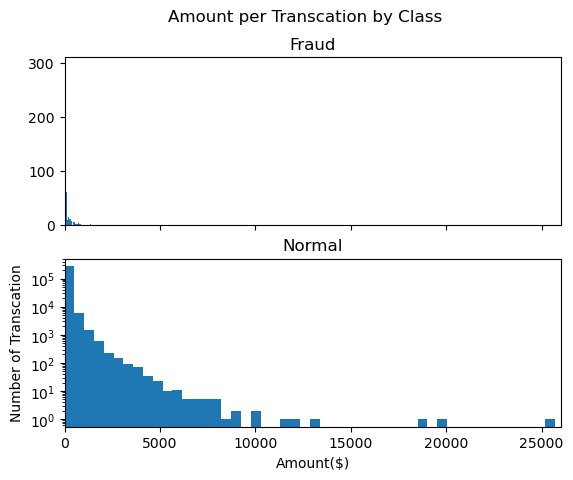

In [30]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("Amount per Transcation by Class")
ax1.hist(fraud.Amount,bins=50)
ax1.set_title("Fraud")
ax2.hist(normal.Amount,bins=50)
ax2.set_title("Normal")
plt.xlabel("Amount($)")
plt.ylabel("Number of Transcation")
plt.xlim((0,26000))
plt.yscale("log")
plt.show()

In [11]:
#campares the transcation of both data point
data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
#UNDER-SAMPLING
#create a sample dataset with similiar distribution of normal and fradulent transcation 
normal_sample= normal.sample(n=492)
normal_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15864,27307.0,1.155819,-0.132901,-0.322069,-0.163635,0.036389,-0.498508,0.306928,-0.138707,-0.277069,...,-0.396651,-1.416493,0.021271,-0.485542,0.149168,0.647712,-0.121629,-0.000547,89.99,0
207080,136508.0,-3.809813,2.721497,-1.859710,-3.120855,-2.461522,-1.727658,-1.831348,2.768187,0.934354,...,0.128738,-0.435474,0.389242,0.007904,-0.282746,-0.832462,-0.801322,-0.103369,4.62,0
69891,53626.0,-1.656287,0.588325,2.570916,-0.277552,-0.675007,0.773352,-0.528697,0.933686,0.417126,...,0.327193,0.945072,-0.209988,0.042253,0.622236,-0.418024,-0.326101,-0.110208,24.64,0
65175,51462.0,0.989057,-0.824522,0.882955,0.150842,-1.175071,0.142394,-0.695072,0.255499,1.116063,...,-0.152843,-0.503269,-0.052770,0.061012,0.076675,0.937749,-0.064655,0.016818,113.19,0
34978,37905.0,-3.486916,2.533189,-0.681303,-2.591220,2.635842,4.435432,-3.632834,-7.714490,0.300258,...,8.290882,-3.620837,-0.347137,0.961993,0.306083,0.932008,0.388830,0.161437,7.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59148,48719.0,-0.428612,1.062899,1.451561,1.290725,0.226434,0.076035,0.663491,0.076341,-0.377752,...,-0.024611,0.312820,-0.143480,0.112577,-0.069538,-0.225608,0.430859,0.206155,14.51,0
205444,135750.0,-0.500230,0.961294,0.222196,-0.245327,-0.405784,-1.614941,0.866739,0.056090,-0.104056,...,-0.070450,-0.278755,0.299467,0.887697,-0.454688,-0.722447,-0.168655,-0.029343,47.52,0
278880,168499.0,-0.304348,0.279830,0.183507,-0.659415,1.042544,-0.844167,0.520217,0.060241,-0.157226,...,-0.194393,-0.570742,0.114351,-0.419704,-0.490667,0.148475,0.226440,0.091246,0.89,0
19340,30198.0,-0.434745,0.986468,1.253999,0.568617,-0.007752,-0.197265,0.045065,-0.788527,-0.353472,...,0.622608,-0.673953,0.180096,0.052805,-0.523025,0.205491,-0.060893,0.024256,1.98,0


In [19]:
#concatinate both dataset having same number of sample i.e 492 from fradulent and 492 from normal_sample
new_credit_data=pd.concat([fraud,normal_sample],axis=0)
new_credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59148,48719.0,-0.428612,1.062899,1.451561,1.290725,0.226434,0.076035,0.663491,0.076341,-0.377752,...,-0.024611,0.312820,-0.143480,0.112577,-0.069538,-0.225608,0.430859,0.206155,14.51,0
205444,135750.0,-0.500230,0.961294,0.222196,-0.245327,-0.405784,-1.614941,0.866739,0.056090,-0.104056,...,-0.070450,-0.278755,0.299467,0.887697,-0.454688,-0.722447,-0.168655,-0.029343,47.52,0
278880,168499.0,-0.304348,0.279830,0.183507,-0.659415,1.042544,-0.844167,0.520217,0.060241,-0.157226,...,-0.194393,-0.570742,0.114351,-0.419704,-0.490667,0.148475,0.226440,0.091246,0.89,0
19340,30198.0,-0.434745,0.986468,1.253999,0.568617,-0.007752,-0.197265,0.045065,-0.788527,-0.353472,...,0.622608,-0.673953,0.180096,0.052805,-0.523025,0.205491,-0.060893,0.024256,1.98,0


In [24]:
new_credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [25]:
new_credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
59148,48719.0,-0.428612,1.062899,1.451561,1.290725,0.226434,0.076035,0.663491,0.076341,-0.377752,...,-0.024611,0.312820,-0.143480,0.112577,-0.069538,-0.225608,0.430859,0.206155,14.51,0
205444,135750.0,-0.500230,0.961294,0.222196,-0.245327,-0.405784,-1.614941,0.866739,0.056090,-0.104056,...,-0.070450,-0.278755,0.299467,0.887697,-0.454688,-0.722447,-0.168655,-0.029343,47.52,0
278880,168499.0,-0.304348,0.279830,0.183507,-0.659415,1.042544,-0.844167,0.520217,0.060241,-0.157226,...,-0.194393,-0.570742,0.114351,-0.419704,-0.490667,0.148475,0.226440,0.091246,0.89,0
19340,30198.0,-0.434745,0.986468,1.253999,0.568617,-0.007752,-0.197265,0.045065,-0.788527,-0.353472,...,0.622608,-0.673953,0.180096,0.052805,-0.523025,0.205491,-0.060893,0.024256,1.98,0
240412,150593.0,1.936221,-0.289263,-1.418198,-0.005386,0.777599,0.910033,-0.190444,0.293175,0.367267,...,-0.202232,-0.392322,0.337661,-1.640587,-0.469914,0.311153,-0.027794,-0.087978,1.79,0


In [28]:
#check again the data point after the sampling 
# new_fraud_data=new_credit_data[new_credit_data["Class"]==1]
# new_normal_data=new_credit_data[new_credit_data["Class"]==0]
# new_credit_data.shape,new_normal_data.shape
new_credit_data["Class"].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

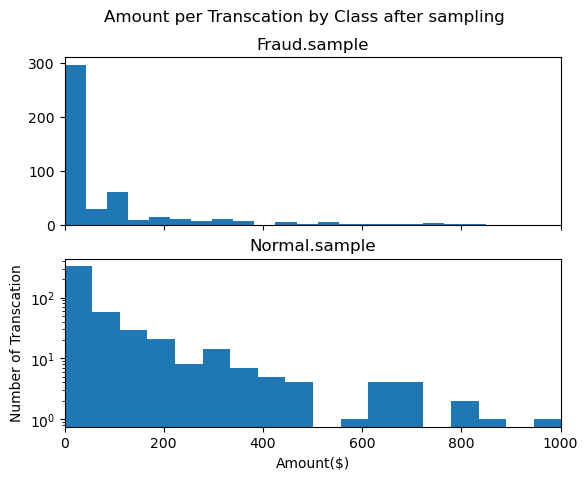

In [48]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("Amount per Transcation by Class after sampling")
ax1.hist(fraud.Amount,bins=50)
ax1.set_title("Fraud.sample")
ax2.hist(normal_sample.Amount,bins=50)
ax2.set_title("Normal.sample")
plt.xlabel("Amount($)")
plt.ylabel("Number of Transcation")
plt.xlim((0,1000))
plt.yscale("log")
plt.show()

In [49]:
#campares the transcation of both data point
new_credit_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94192.682927,-0.132791,-0.041183,0.116909,0.125748,-0.136304,0.057605,0.020665,0.060060,-0.071442,...,0.007734,0.042215,-0.007625,-0.009310,-0.020459,0.039224,-0.010307,0.012710,-0.014482,109.666809
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [50]:
X=new_credit_data.drop("Class",axis=1)
Y=new_credit_data["Class"]

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=2,random_state=20)

In [60]:
X.shape,X_train.shape,X_test.shape

((984, 30), (982, 30), (2, 30))

In [52]:
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
#prediction and accuracy of training data
Y_pred=model.predict(X_train)
training_accuracy=accuracy_score(Y_pred,Y_train)
training_accuracy

0.9572301425661914

In [70]:
#prediction and accuracy of test data
Y_test_pred=model.predict(X_test)
test_accuracy=accuracy_score(Y_test_pred,Y_test)
test_accuracy

1.0

In [74]:
class_report=classification_report(Y_test,Y_test_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         2\n\n    accuracy                           1.00         2\n   macro avg       1.00      1.00      1.00         2\nweighted avg       1.00      1.00      1.00         2\n'

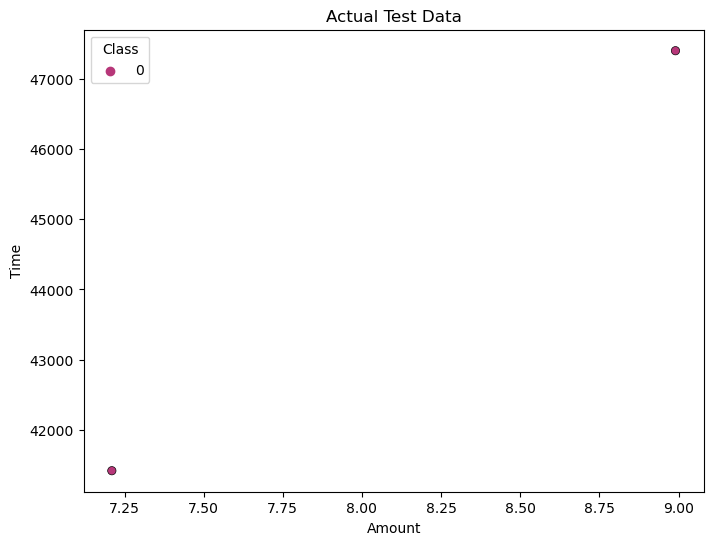

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['Amount'], y=X_test['Time'], hue=Y_test, palette='magma', edgecolor='black')
plt.title("Actual Test Data")
plt.xlabel("Amount")
plt.ylabel("Time")
plt.show()